Preprocesamiento

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Load the data from the CSV file
file_path = '/Users/victoria/Desktop/5tocuatrimestre/ml/tps/tp2ml/machineLearning/data/processed/toyota_dev_processed.csv'
data = np.genfromtxt(file_path, delimiter=',')
raw_data = np.genfromtxt('/Users/victoria/Desktop/5tocuatrimestre/ml/tps/tp2ml/machineLearning/data/raw/toyota_dev.csv', delimiter=',', skip_header=1, dtype=str)

vehicle_id_col = data[:, 0]            # Columna del ID del Vehículo
vehicle_type_cols = data[:, 1:4]       # Columnas del Tipo de Vehículo (3 columnas: 1, 2, 3)
year_col = data[:, 4]                  # Columna del Año de Fabricación (columna 4)
fuel_type_cols = data[:, 5:10]         # Columnas para el Tipo de Combustible (5 columnas: 5, 6, 7, 8, 9)
transmission_cols = data[:, 10:13]     # Columnas para la Transmisión (3 columnas: 10, 11, 12)
motor_col = data[:, 13]                # Columna del Motor (columna 13)
kilometers_col = data[:, 14]           # Columna de Kilómetros Recorridos (columna 14)
seller_type_cols = data[:, 15:18]      # Columnas para el Tipo de Vendedor (3 columnas: 15, 16, 17)
price_col = data[:, 18]                # Columna del Precio (columna 18)




Ejercicio 1

A

1. 

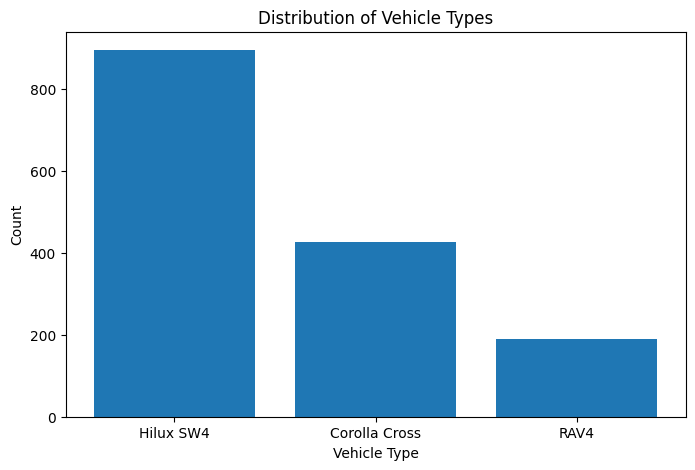

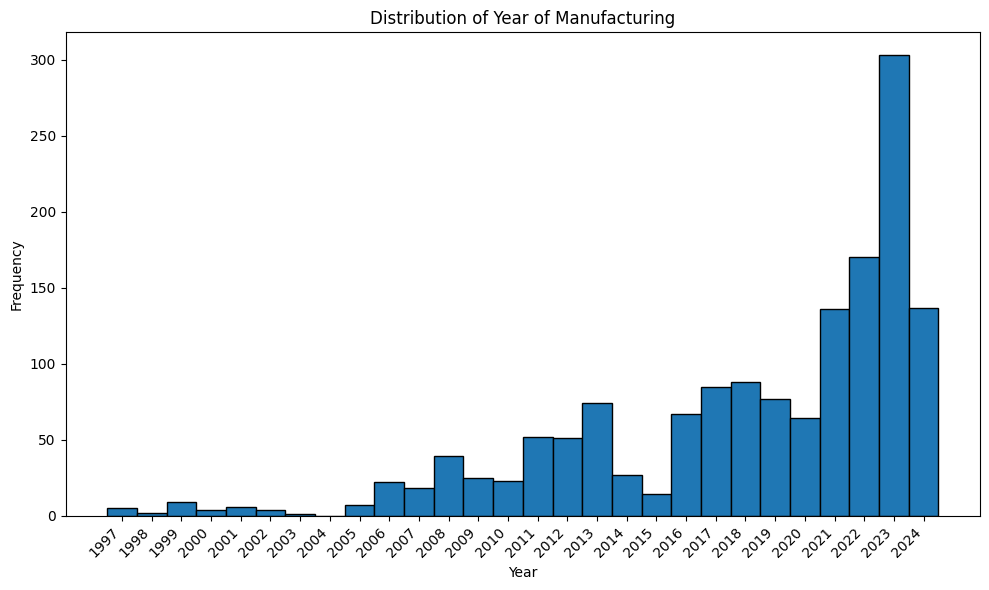

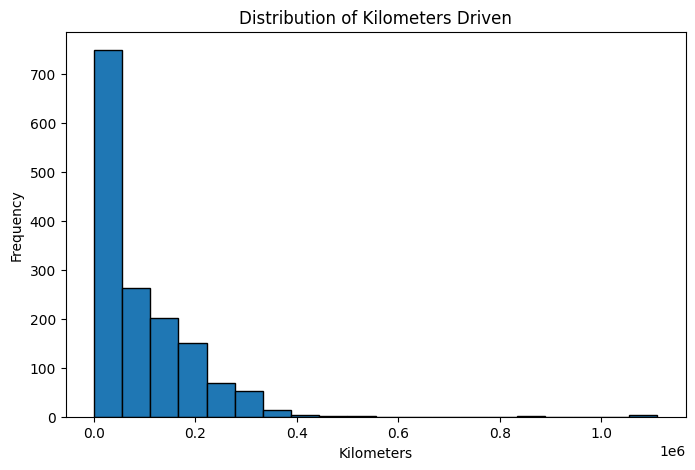

In [12]:
def generate_histograms(data):
    # Vehicle Types (assuming they are one-hot encoded in columns 1:4)
    vehicle_type_cols = data[:, 1:4]
    vehicle_type_sums = np.sum(vehicle_type_cols, axis=0)
    
    # Year of Manufacturing (assuming it's in column 4)
    year_col = data[:, 4].astype(float)
    
    # Kilometers Driven (assuming it's in column 14)
    kilometers_col = data[:, 14].astype(float)
    
    # 1. Histogram for Vehicle Types
    plt.figure(figsize=(8, 5))
    plt.bar(['Hilux SW4', 'Corolla Cross', 'RAV4'], vehicle_type_sums)
    plt.title('Distribution of Vehicle Types')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Count')
    plt.show()
    
    # 2. Histogram for Year of Manufacturing
    plt.figure(figsize=(10, 6))

    # Define the range of years (you can customize this range based on your data)
    min_year = int(min(year_col))  # Minimum year in the data
    max_year = int(max(year_col))  # Maximum year in the data

    # Create bins for each individual year
    bins = np.arange(min_year, max_year + 2)  # One bin for each year

    # Plot the histogram
    plt.hist(year_col, bins=bins, edgecolor='black', align='left')
    plt.title('Distribution of Year of Manufacturing')
    plt.xlabel('Year')
    plt.ylabel('Frequency')

    # Rotate x-tick labels for readability
    plt.xticks(np.arange(min_year, max_year + 1, step=1), rotation=45, ha='right')

    plt.tight_layout()  # Adjust the layout to prevent clipping of tick labels
    plt.show()

    # 3. Histogram for Kilometers Driven
    plt.figure(figsize=(8, 5))
    plt.hist(kilometers_col, bins=20, edgecolor='black')
    plt.title('Distribution of Kilometers Driven')
    plt.xlabel('Kilometers')
    plt.ylabel('Frequency')
    plt.show()

# Call the function with the preprocessed data
generate_histograms(data)


2. 

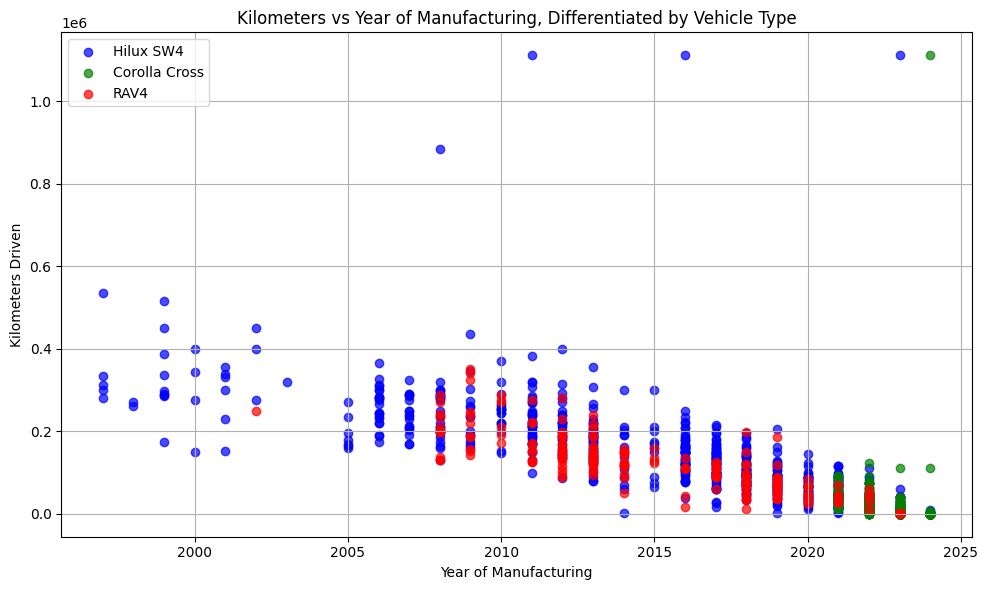

In [14]:
def scatter_plot_vehicle_type(data):
    # Assuming the columns are as follows based on your previous structure:
    # - Year (column 4)
    # - Kilometers (column 14)
    # - Vehicle Type (one-hot encoded in columns 1:4)
    
    # Extract columns
    year_col = data[:, 4].astype(float)         # Year of manufacturing
    kilometers_col = data[:, 14].astype(float)  # Kilometers driven
    vehicle_type_cols = data[:, 1:4]            # One-hot encoded vehicle types (Hilux SW4, Corolla Cross, RAV4)

    # Separate data by vehicle type
    hilux_mask = vehicle_type_cols[:, 0] == 1  # Hilux SW4
    corolla_mask = vehicle_type_cols[:, 1] == 1  # Corolla Cross
    rav4_mask = vehicle_type_cols[:, 2] == 1  # RAV4

    # Create scatter plot
    plt.figure(figsize=(10, 6))

    # Scatter for Hilux SW4
    plt.scatter(year_col[hilux_mask], kilometers_col[hilux_mask], color='blue', label='Hilux SW4', alpha=0.7)

    # Scatter for Corolla Cross
    plt.scatter(year_col[corolla_mask], kilometers_col[corolla_mask], color='green', label='Corolla Cross', alpha=0.7)

    # Scatter for RAV4
    plt.scatter(year_col[rav4_mask], kilometers_col[rav4_mask], color='red', label='RAV4', alpha=0.7)

    # Adding plot labels and legend
    plt.title('Kilometers vs Year of Manufacturing, Differentiated by Vehicle Type')
    plt.xlabel('Year of Manufacturing')
    plt.ylabel('Kilometers Driven')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function with your preprocessed data
scatter_plot_vehicle_type(data)


3. 

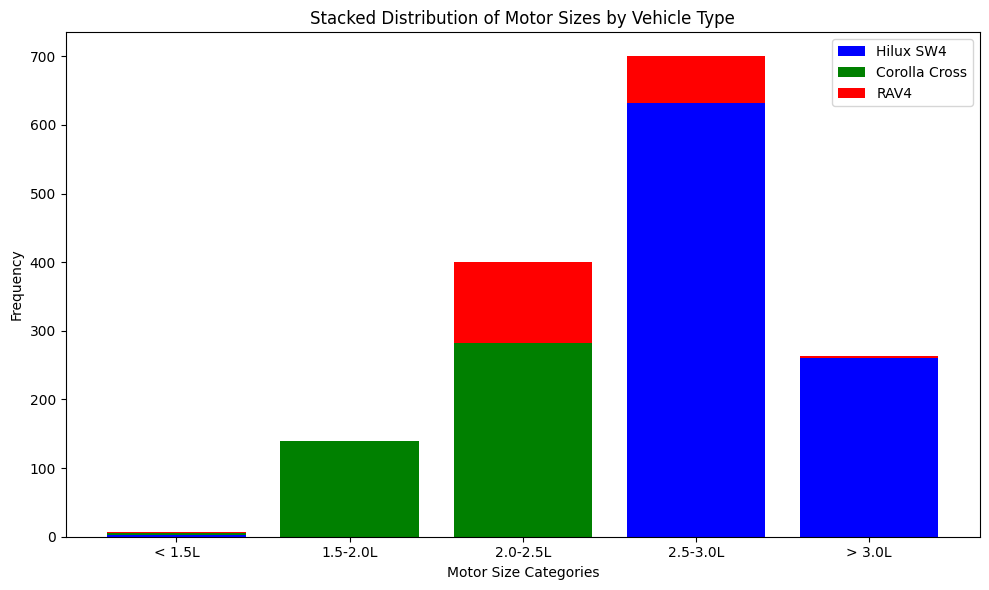

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def stacked_bar_motor_distribution(data):
    # Assuming columns:
    # - Motor (column 13)
    # - Vehicle Type (one-hot encoded in columns 1:4)
    
    # Extract columns
    motor_col = data[:, 13].astype(float)  # Motor column
    vehicle_type_cols = data[:, 1:4]       # One-hot encoded vehicle types (Hilux SW4, Corolla Cross, RAV4)

    # Separate data by vehicle type
    hilux_mask = vehicle_type_cols[:, 0] == 1  # Hilux SW4
    corolla_mask = vehicle_type_cols[:, 1] == 1  # Corolla Cross
    rav4_mask = vehicle_type_cols[:, 2] == 1  # RAV4

    # Define bins for motor sizes
    motor_bins = [0, 1.5, 2.0, 2.5, 3.0, np.inf]  # Bins to include everything larger than 3.0L
    motor_labels = ['< 1.5L', '1.5-2.0L', '2.0-2.5L', '2.5-3.0L', '> 3.0L']

    # Bin the motor values
    motor_binned_hilux = np.digitize(motor_col[hilux_mask], motor_bins) - 1
    motor_binned_corolla = np.digitize(motor_col[corolla_mask], motor_bins) - 1
    motor_binned_rav4 = np.digitize(motor_col[rav4_mask], motor_bins) - 1

    # Count occurrences in each bin
    hilux_counts = np.bincount(motor_binned_hilux, minlength=len(motor_labels))
    corolla_counts = np.bincount(motor_binned_corolla, minlength=len(motor_labels))
    rav4_counts = np.bincount(motor_binned_rav4, minlength=len(motor_labels))

    # Stacked bar chart
    plt.figure(figsize=(10, 6))
    
    # Plot stacked bars
    plt.bar(motor_labels, hilux_counts, label='Hilux SW4', color='blue')
    plt.bar(motor_labels, corolla_counts, bottom=hilux_counts, label='Corolla Cross', color='green')
    plt.bar(motor_labels, rav4_counts, bottom=hilux_counts + corolla_counts, label='RAV4', color='red')

    # Add labels and legend
    plt.xlabel('Motor Size Categories')
    plt.ylabel('Frequency')
    plt.title('Stacked Distribution of Motor Sizes by Vehicle Type')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function with your preprocessed data
stacked_bar_motor_distribution(data)


4. 

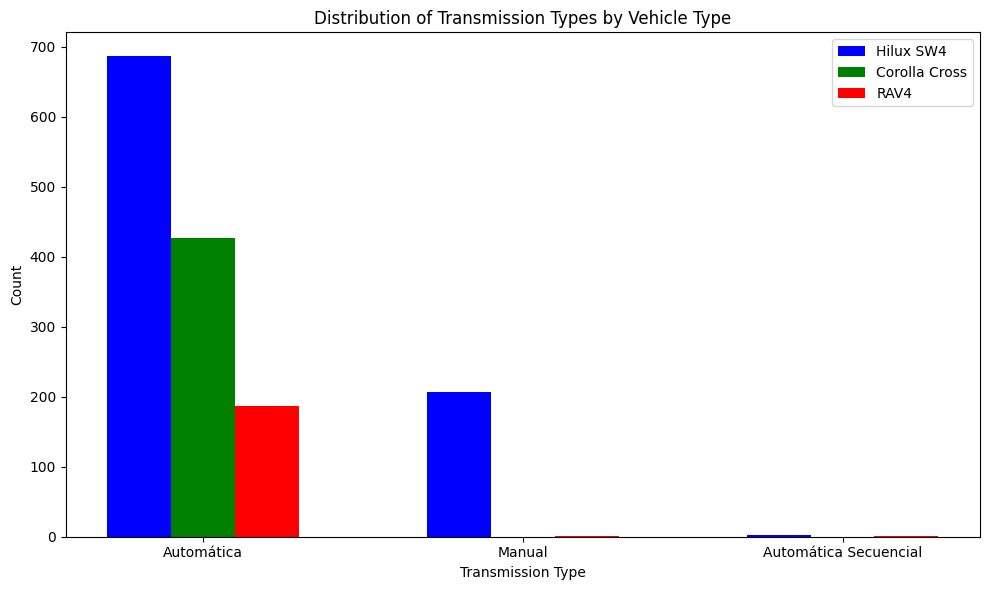

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def compare_transmission_distribution(data):
    # Assuming columns:
    # - Transmission (one-hot encoded in columns 10:13)
    # - Vehicle Type (one-hot encoded in columns 1:4)
    
    # Extract columns
    transmission_cols = data[:, 10:13]   # One-hot encoded transmission types
    vehicle_type_cols = data[:, 1:4]     # One-hot encoded vehicle types (Hilux SW4, Corolla Cross, RAV4)

    # Separate data by vehicle type
    hilux_mask = vehicle_type_cols[:, 0] == 1  # Hilux SW4
    corolla_mask = vehicle_type_cols[:, 1] == 1  # Corolla Cross
    rav4_mask = vehicle_type_cols[:, 2] == 1  # RAV4

    # Count transmission types for each vehicle type
    hilux_transmission = np.sum(transmission_cols[hilux_mask], axis=0)
    corolla_transmission = np.sum(transmission_cols[corolla_mask], axis=0)
    rav4_transmission = np.sum(transmission_cols[rav4_mask], axis=0)

    # Labels for transmission types
    transmission_labels = ['Automática', 'Manual', 'Automática Secuencial']

    # Create grouped bar chart
    bar_width = 0.2
    index = np.arange(len(transmission_labels))

    plt.figure(figsize=(10, 6))

    # Hilux SW4 bars
    plt.bar(index, hilux_transmission, bar_width, label='Hilux SW4', color='blue')

    # Corolla Cross bars (shifted by bar_width)
    plt.bar(index + bar_width, corolla_transmission, bar_width, label='Corolla Cross', color='green')

    # RAV4 bars (shifted by 2 * bar_width)
    plt.bar(index + 2 * bar_width, rav4_transmission, bar_width, label='RAV4', color='red')

    # Adding labels and legend
    plt.xlabel('Transmission Type')
    plt.ylabel('Count')
    plt.title('Distribution of Transmission Types by Vehicle Type')
    plt.xticks(index + bar_width, transmission_labels)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function with your preprocessed data
compare_transmission_distribution(data)


5. 

La variable "Color" se eliminó del conjunto de datos debido a un alto porcentaje de valores faltantes. Con datos incompletos, analizar la distribución de los colores podría generar conclusiones sesgadas o inexactas. Sin embargo, para completar el análisis, se utilizaron las filas disponibles de los datos antes del preprocesamiento que sí contienen información sobre los colores para proporcionar algunos insights basados en ese subconjunto.

Al analizar los datos con la información de color disponible, se observó que los colores más comunes son Gris, Blanco, y Negro, especialmente en el modelo Hilux SW4. Además, el Corolla Cross muestra una distribución equilibrada entre varios colores, mientras que el RAV4 tiene una representación menor en general para todos los colores. Los colores menos frecuentes, como Marrón, Rojo, Gris Oscuro, y Azul, aparecen en cantidades mucho menores.










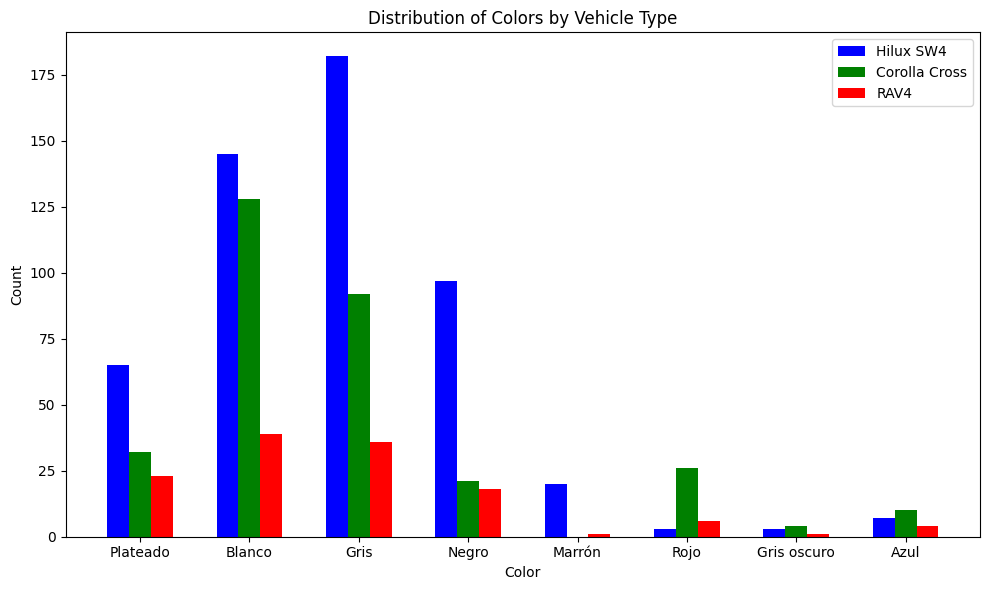

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def compare_color_distribution(data):
    color_categories = ['Plateado', 'Blanco', 'Gris', 'Negro', 'Marrón', 'Rojo', 'Gris oscuro', 'Azul']
    
    color_col = data[:, 3]  # Color column
    vehicle_type_col = data[:, 1]  # Vehicle type column

    hilux_mask = vehicle_type_col == 'Hilux SW4'
    corolla_mask = vehicle_type_col == 'Corolla Cross'
    rav4_mask = vehicle_type_col == 'RAV4'

    hilux_colors = [np.sum(color_col[hilux_mask] == color) for color in color_categories]
    corolla_colors = [np.sum(color_col[corolla_mask] == color) for color in color_categories]
    rav4_colors = [np.sum(color_col[rav4_mask] == color) for color in color_categories]

    bar_width = 0.2
    index = np.arange(len(color_categories))

    plt.figure(figsize=(10, 6))

    plt.bar(index, hilux_colors, bar_width, label='Hilux SW4', color='blue')

    plt.bar(index + bar_width, corolla_colors, bar_width, label='Corolla Cross', color='green')

    plt.bar(index + 2 * bar_width, rav4_colors, bar_width, label='RAV4', color='red')

    plt.xlabel('Color')
    plt.ylabel('Count')
    plt.title('Distribution of Colors by Vehicle Type')
    plt.xticks(index + bar_width, color_categories)
    plt.legend()
    plt.tight_layout()
    plt.show()

compare_color_distribution(raw_data)


B

1.

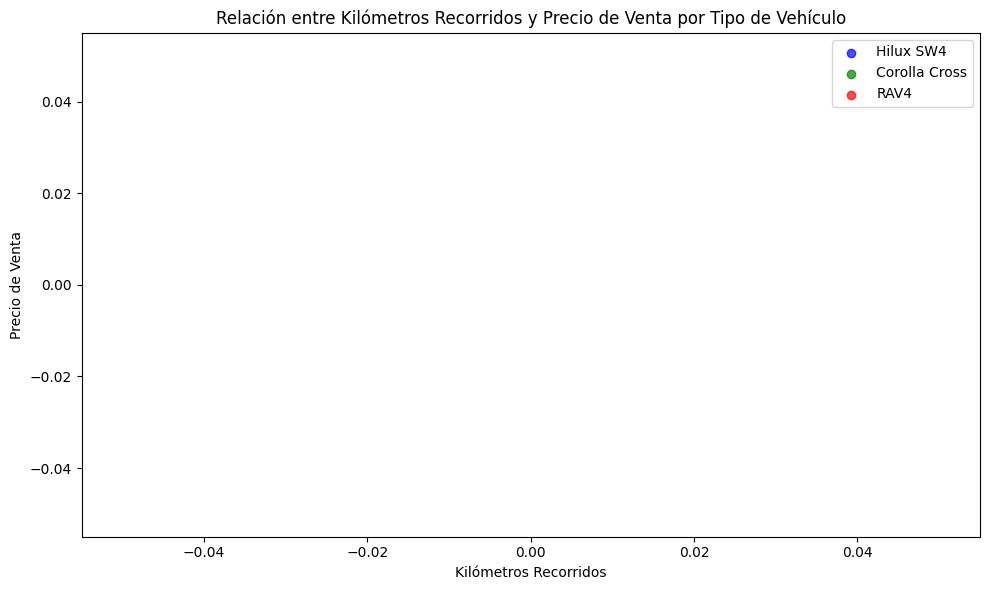

In [42]:
import matplotlib.pyplot as plt
import numpy as np

def plot_price_vs_kilometers(data):
    # Extract relevant columns
    kilometers_col = data[:, 14].astype(float)  # Kilometers column (index 14)
    price_col = data[:, 18].astype(float)       # Price column (index 18)
    vehicle_type_col = data[:, 0]               # Vehicle type column (index 0)

    # Masks for vehicle types
    hilux_mask = vehicle_type_col == 'Hilux SW4'
    corolla_mask = vehicle_type_col == 'Corolla Cross'
    rav4_mask = vehicle_type_col == 'RAV4'

    plt.figure(figsize=(10, 6))

    # Plot price vs kilometers for each vehicle type
    plt.scatter(kilometers_col[hilux_mask], price_col[hilux_mask], label='Hilux SW4', color='blue', alpha=0.7)
    plt.scatter(kilometers_col[corolla_mask], price_col[corolla_mask], label='Corolla Cross', color='green', alpha=0.7)
    plt.scatter(kilometers_col[rav4_mask], price_col[rav4_mask], label='RAV4', color='red', alpha=0.7)

    # Adding labels and legend
    plt.xlabel('Kilómetros Recorridos')
    plt.ylabel('Precio de Venta')
    plt.title('Relación entre Kilómetros Recorridos y Precio de Venta por Tipo de Vehículo')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function with your preprocessed data
plot_price_vs_kilometers(data)


2.

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_29212/3557906824.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(price_data_by_type, labels=vehicle_types, patch_artist=True)


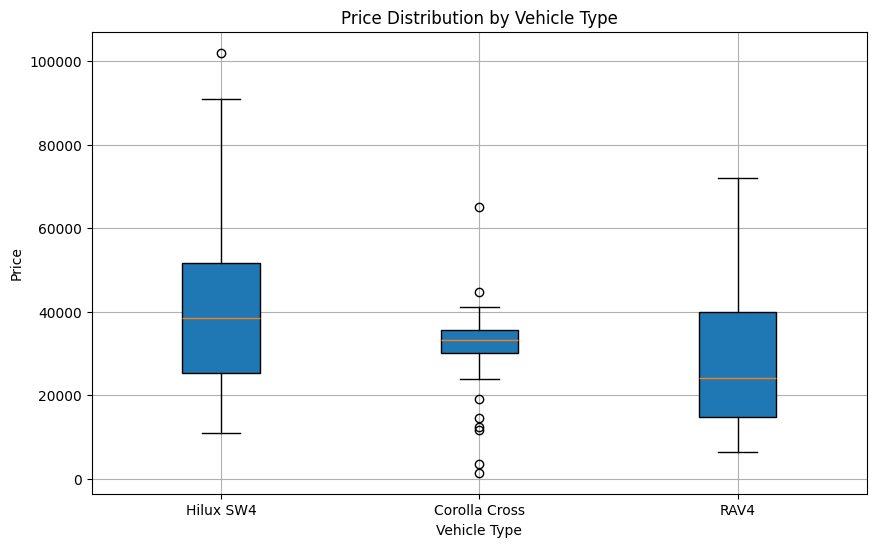

In [11]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes las columnas correspondientes
vehicle_types = ['Hilux SW4', 'Corolla Cross', 'RAV4']

# Crear una lista para almacenar los precios por tipo de vehículo
price_data_by_type = []

for i in range(1, 4):  # Asumiendo que 1: 'Hilux SW4', 2: 'Corolla Cross', 3: 'RAV4'
    prices_for_type = price_col[vehicle_type_col == i]
    price_data_by_type.append(prices_for_type)

# Crear el boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(price_data_by_type, labels=vehicle_types, patch_artist=True)

plt.title('Price Distribution by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()


La Hilux SW4 tiene una mayor variabilidad en los precios y presenta al menos un outlier en la parte superior. La Corolla Cross tiene la menor variabilidad en precios, pero con varios outliers en ambos extremos, lo que sugiere que hay vehículos con precios significativamente más bajos o más altos de lo normal. La RAV4 muestra una variabilidad considerable y ningún outlier.


3. 

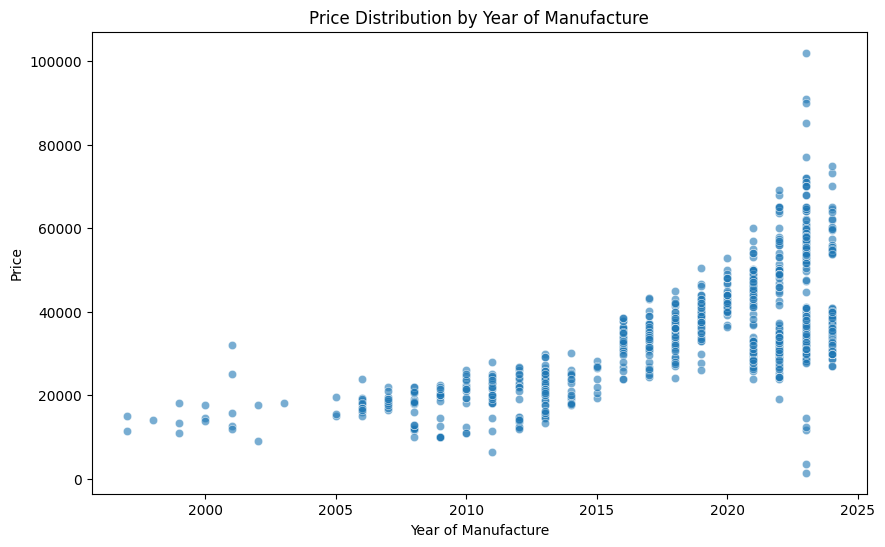

In [12]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes tus datos en las variables correspondientes
# year_col es la columna con los años de los vehículos
# price_col es la columna con los precios de venta

plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión
plt.scatter(year_col, price_col, alpha=0.6, edgecolors='w', linewidth=0.5)

# Añadir título y etiquetas
plt.title('Price Distribution by Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price')

# Mostrar el gráfico
plt.show()


4. 

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_29212/3367357258.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([price_col[color_cols[:, i] == 1] for i in range(len(colors))], labels=colors)


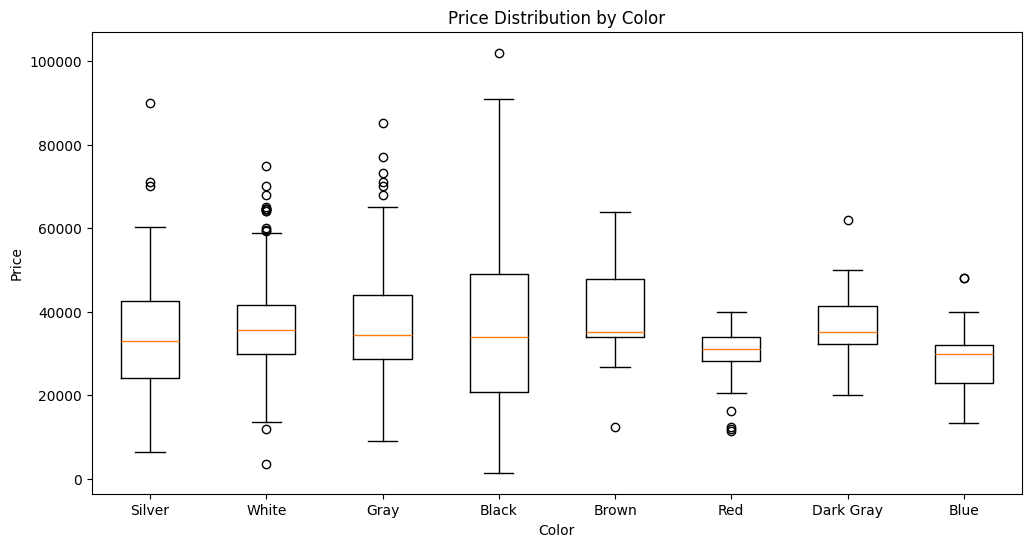

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_29212/3367357258.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([price_col[(color_cols[:, j] == 1) & (vehicle_type_col == i+1)] for j in range(len(colors))], labels=colors)


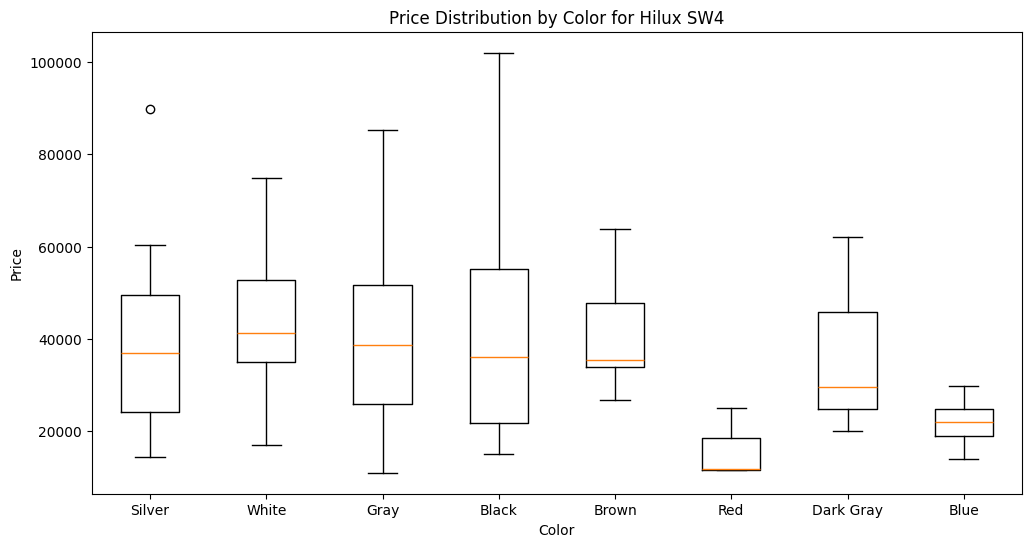

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_29212/3367357258.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([price_col[(color_cols[:, j] == 1) & (vehicle_type_col == i+1)] for j in range(len(colors))], labels=colors)


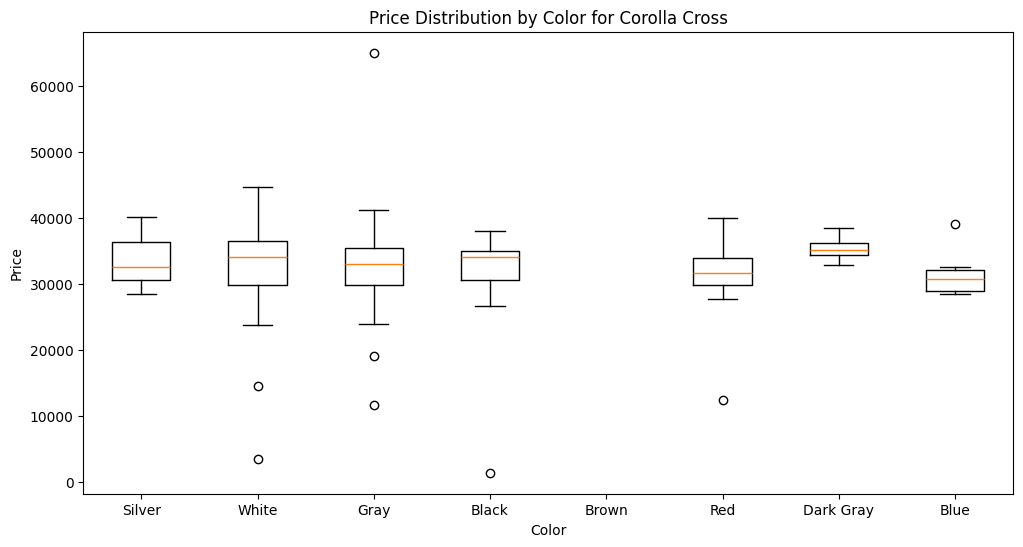

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_29212/3367357258.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([price_col[(color_cols[:, j] == 1) & (vehicle_type_col == i+1)] for j in range(len(colors))], labels=colors)


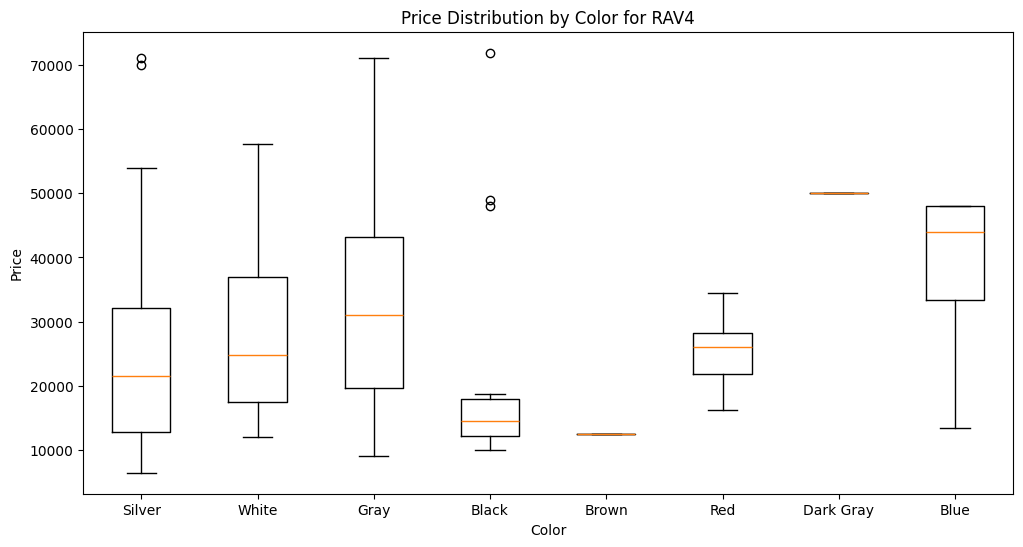

In [13]:
import matplotlib.pyplot as plt

colors = ['Silver', 'White', 'Gray', 'Black', 'Brown', 'Red', 'Dark Gray', 'Blue']

plt.figure(figsize=(12, 6))
plt.boxplot([price_col[color_cols[:, i] == 1] for i in range(len(colors))], labels=colors)
plt.title('Price Distribution by Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

models = ['Hilux SW4', 'Corolla Cross', 'RAV4']
for i, model in enumerate(models):
    plt.figure(figsize=(12, 6))
    plt.boxplot([price_col[(color_cols[:, j] == 1) & (vehicle_type_col == i+1)] for j in range(len(colors))], labels=colors)
    plt.title(f'Price Distribution by Color for {model}')
    plt.xlabel('Color')
    plt.ylabel('Price')
    plt.show()


5. 

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_1192/3766138591.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([price_col[fuel_type_cols[:, i] == 1] for i in range(len(fuel_types))], labels=fuel_types)


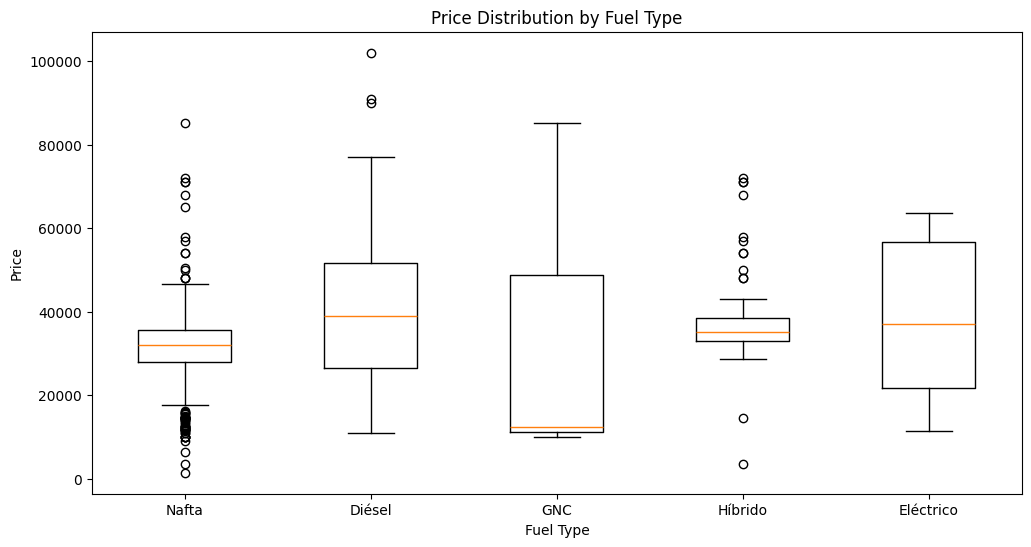

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_1192/3766138591.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([price_col[(fuel_type_cols[:, j] == 1) & (vehicle_type_col == i+1)] for j in range(len(fuel_types))], labels=fuel_types)


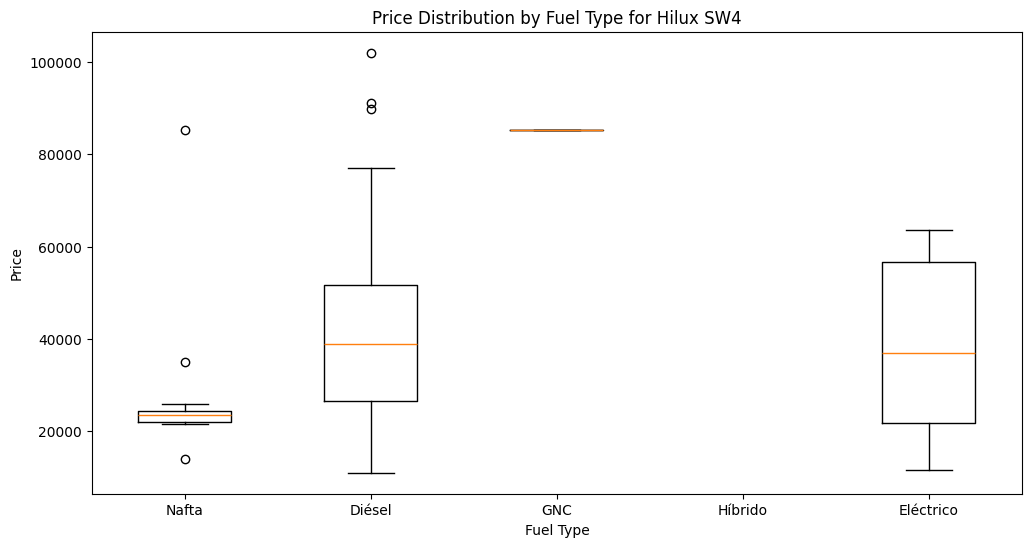

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_1192/3766138591.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([price_col[(fuel_type_cols[:, j] == 1) & (vehicle_type_col == i+1)] for j in range(len(fuel_types))], labels=fuel_types)


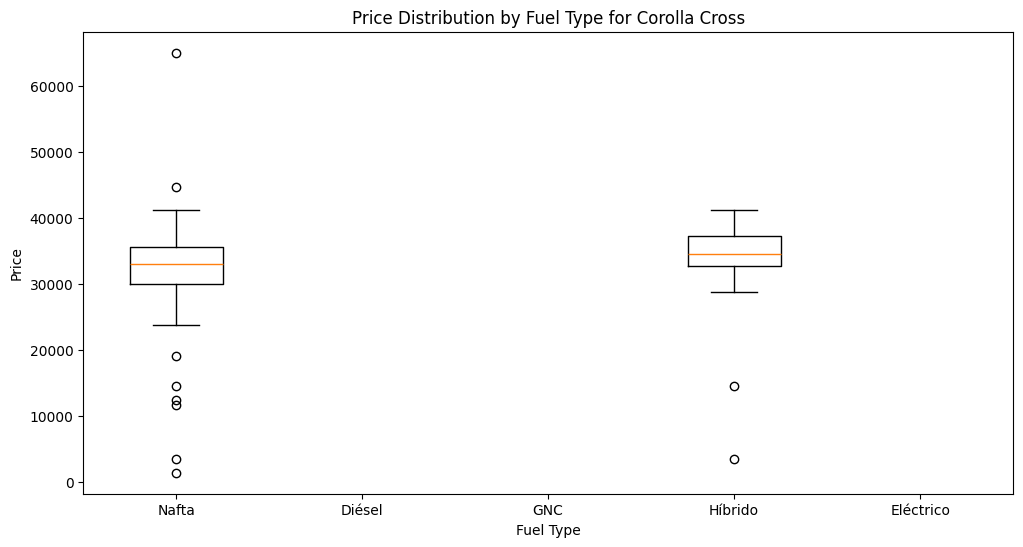

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_1192/3766138591.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([price_col[(fuel_type_cols[:, j] == 1) & (vehicle_type_col == i+1)] for j in range(len(fuel_types))], labels=fuel_types)


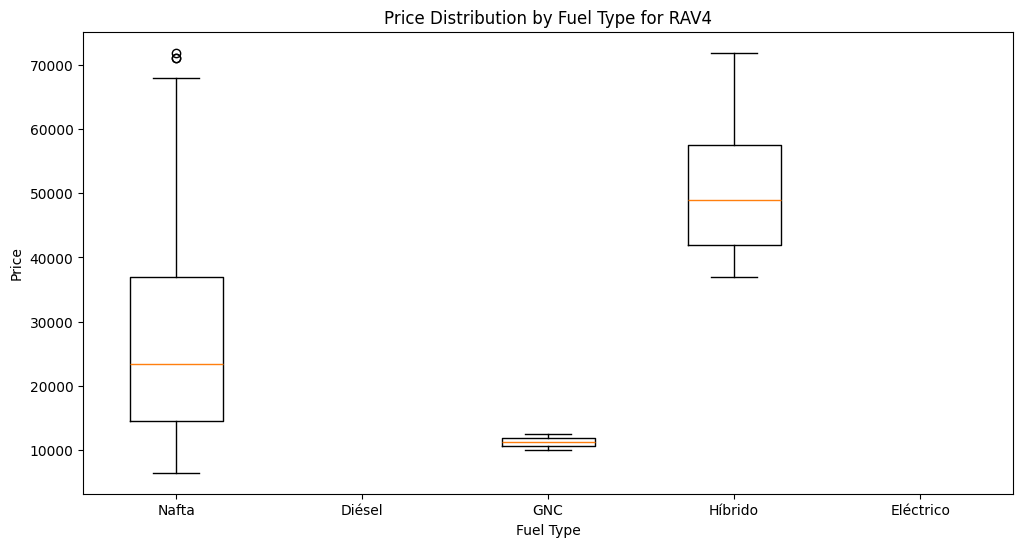

In [74]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes tus datos en las variables correspondientes:
# price_col es la columna con los precios de venta
# fuel_type_cols es la lista de columnas que representa cada tipo de combustible con un valor binario (0 o 1)

# Tipos de combustible considerados en el análisis
fuel_types = ['Nafta', 'Diésel', 'GNC', 'Híbrido', 'Eléctrico']  # Ajusta según corresponda

# Crear un boxplot para cada tipo de combustible
plt.figure(figsize=(12, 6))
plt.boxplot([price_col[fuel_type_cols[:, i] == 1] for i in range(len(fuel_types))], labels=fuel_types)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

# Análisis por modelo específico
models = ['Hilux SW4', 'Corolla Cross', 'RAV4']
for i, model in enumerate(models):
    plt.figure(figsize=(12, 6))
    plt.boxplot([price_col[(fuel_type_cols[:, j] == 1) & (vehicle_type_col == i+1)] for j in range(len(fuel_types))], labels=fuel_types)
    plt.title(f'Price Distribution by Fuel Type for {model}')
    plt.xlabel('Fuel Type')
    plt.ylabel('Price')
    plt.show()


6. 

In [ ]:
# FALTA EL 6, 7 Y 8

Ejercicio 2

In [14]:
# Separar características (X) y la variable objetivo (y)
X = data[:, :-1]  # Todas las columnas excepto la última
y = data[:, -1]   # Solo la última columna

# Número total de muestras
n_samples = X.shape[0]

# Índice para dividir el 80% para entrenamiento y 20% para validación
split_index = int(0.8 * n_samples)

# Mezclar los datos antes de dividir (opcional pero recomendable)
indices = np.random.permutation(n_samples)
X = X[indices]
y = y[indices]

# División de los datos
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)


Shape of X_train: (772, 23)
Shape of y_train: (772,)
Shape of X_val: (193, 23)
Shape of y_val: (193,)


In [15]:
import sys
import os

# Añadir la ruta del directorio donde está 'models.py'
sys.path.append('/Users/victoria/Desktop/5tocuatrimestre/ml/tps/tp2ml/machineLearning/src')

# Ahora intenta importar
from models import RidgeRegression, LocallyWeightedRegression, NonLinearRegression

# Ridge Regression
ridge_model = RidgeRegression(alpha=0.5)
ridge_model.fit(X_train, y_train)
predictions_ridge = ridge_model.predict(X_val)

# Locally Weighted Regression: TENGO QUE NORMALIZAR LOS DATOS PARA QUE FUNCIONE!
lwr_model = LocallyWeightedRegression(tau=0.1)
# predictions_lwr = [lwr_model.predict(x, X_train, y_train) for x in X_val]

# Non-Linear Regression
nonlinear_model = NonLinearRegression(degree=3)
nonlinear_model.fit(X_train, y_train)
predictions_nonlinear = nonlinear_model.predict(X_val)


In [21]:
from metrics import rmse, mae, r2_score

# Calcular métricas para Ridge Regression
rmse_ridge = rmse(y_val, predictions_ridge)
mae_ridge = mae(y_val, predictions_ridge)
r2_ridge = r2_score(y_val, predictions_ridge)

# Imprimir métricas para Ridge Regression
print("Ridge Regression Metrics:")
print(f"RMSE: {rmse_ridge}")
print(f"MAE: {mae_ridge}")
print(f"R2: {r2_ridge}")
print("-" * 30)


# Calcular métricas para Locally Weighted Regression: TENGO QUE NORMALIZAR LOS DATOS PARA QUE FUNCIONE!
# rmse_lwr = rmse(y_val, predictions_lwr)
# mae_lwr = mae(y_val, predictions_lwr)
# r2_lwr = r2_score(y_val, predictions_lwr)

# Calcular métricas para Non-Linear Regression
rmse_nonlinear = rmse(y_val, predictions_nonlinear)
mae_nonlinear = mae(y_val, predictions_nonlinear)
r2_nonlinear = r2_score(y_val, predictions_nonlinear)

# Imprimir métricas para Non-Linear Regression
print("Non-Linear Regression Metrics:")
print(f"RMSE: {rmse_nonlinear}")
print(f"MAE: {mae_nonlinear}")
print(f"R2: {r2_nonlinear}")



Ridge Regression Metrics:
RMSE: nan
MAE: nan
R2: nan
------------------------------
Non-Linear Regression Metrics:
RMSE: nan
MAE: nan
R2: nan
Check for NaNs in y_val: False
Check for NaNs in predictions_ridge: True
Check for NaNs in predictions_nonlinear: True
